# Анализ статистик

In [1]:
%load_ext autoreload
%autoreload 2

import os

In [2]:
path_list = os.getcwd().split('\\')
if path_list[-1] == 'src':
    print(os.getcwd())
else:
    os.chdir('..')
    print(os.getcwd())

F:\study\Hackatons\DashboardSber\src


In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Загрузка данных

In [6]:
from datetime import datetime


def fix_date_columns(df):
    new_columns = [df.columns[0]]
    for column in df.columns[1:]:
        date = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(column) - 2).strftime('%Y-%m-%d')
        new_columns.append(date)

    df.columns = new_columns
    return df

In [7]:
df_acquiring = pd.read_excel(
    io='dataset/acquiring.xlsb',
    engine='pyxlsb',
    header=1,  # У файла есть заголовок-объединение
)
df_acquiring = fix_date_columns(df_acquiring)

print(df_acquiring.shape)
df_acquiring.head(3)

(48423, 25)


,клиент,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,client_37877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,client_30115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
2,client_9554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_rko = pd.read_excel(
    io='dataset/rko.xlsb',
    engine='pyxlsb',
    header=1,  # У файла есть заголовок-объединение
)
df_rko = fix_date_columns(df_rko)

print(df_rko.shape)
df_rko.head(3)

(48423, 26)


,клиент,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,client_37877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,client_30115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,client_9554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1


In [34]:
df_economy_acquiring = pd.read_excel(
    io='dataset/economy_acquiring.xlsb',
    engine='pyxlsb',
    header=1,  # У файла есть заголовок-объединение
)
df_economy_acquiring = df_economy_acquiring.iloc[:, 1:].abs()

print(df_economy_acquiring.shape)
df_economy_acquiring.head(3)

(48423, 16)


,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_economy_general = pd.read_excel(
    io='dataset/economy_general.xlsb',
    engine='pyxlsb',
    header=1,  # У файла есть заголовок-объединение
)
df_economy_general = df_economy_general.iloc[:, 1:].abs()

print(df_economy_general.shape)
df_economy_general.head(3)

(48423, 16)


,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,0.0,0.0,240.386395,240.386395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,9219.383895,12182.148954,5010.688861,6565.499468,1709.049427,113181.130741,93038.058135,85114.707843,84129.874116,77920.226498,78022.706062,74640.449573,68605.635364
2,0.0,0.0,0.000000,938.485467,675.152868,21494.963880,2501.087275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_general = pd.read_excel(
    io='dataset/general.xlsb',
    engine='pyxlsb',
    header=0,  # У файла есть заголовок-объединение
)
df_general['Кластер'] = df_general['Кластер'].astype('category')

print(df_general.shape)
df_general.head(3)

(48423, 118)


,клиент,Сегмент id,Кластер,Средний возраст работников,Тип организации,bank_1,bank_2,bank_3,bank_4,bank_5,bank_6,bank_7,bank_8,bank_9,bank_10,bank_11,bank_12,bank_13,bank_14,bank_15,bank_16,bank_17,bank_18,bank_19,bank_20,bank_21,bank_22,bank_23,bank_24,bank_25,bank_26,bank_27,bank_28,bank_29,bank_30,bank_31,bank_32,bank_33,bank_34,bank_35,bank_36,bank_37,bank_38,bank_39,bank_40,bank_41,bank_42,bank_43,bank_44,bank_45,bank_46,bank_47,bank_48,bank_49,bank_50,ns_promotion,acquiring_mobile,acreditiv,arenda_seyf,bank_straxovanie_imush,bank_straxovanie_lich,bank_straxovanie_otvet,broker,capital_markets,cash_management,dbo,dcd,deposit_sertificat,einvoicing,eko_docdoc,eko_interkomp,eko_korus,eko_sbermobile,eko_segmento,eko_tot,factoring,garantee_gos,garantee_kontract,garantee_other,invest_kredit,itog_bank,itog_eko,kbk,konversion,mb_a,ns_bukh,ns_business,ns_document,ns_in_app,nso,ns_priem_plat,ns_servis,ns_terminal,ns_torg,oborot_kredit,obsluzh_rts_rur,obsluzh_rts_val,overdraft_kredit,pfi,products_lizing,proekt_finans,spec_acc,us,veksel,bank_guarantees,credit,corporate_cards,valuta_control,deposit,inkass,acquiring_torg,rko,zarplat_projects,samoinkass,"ОКВЭД, основная деятельность","ОКВЭД, дополнительные",Наименование основного ОКВЭД,Компания в стадии ликвидации
0,client_5139,0,2,[40-48),ИП,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,47.91,NaN,Торговля розничная по почте или по информацион...,0
1,client_16112,0,5,[0-27),ИП,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,46.90,"46.12,43.29,81.21,43.39,52.24,43.21,46.74,52.2...",Торговля оптовая неспециализированная,0
2,client_21152,0,5,[34-40),ИП,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96.02.1,96.02.2,Предоставление парикмахерских услуг,0


In [ ]:
# pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')

# Info

In [12]:
df_acquiring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   клиент      48423 non-null  object
 1   2021-10-31  48423 non-null  int64 
 2   2021-11-30  48423 non-null  int64 
 3   2021-12-31  48423 non-null  int64 
 4   2022-01-31  48423 non-null  int64 
 5   2022-02-28  48423 non-null  int64 
 6   2022-03-31  48423 non-null  int64 
 7   2022-04-30  48423 non-null  int64 
 8   2022-05-31  48423 non-null  int64 
 9   2022-06-30  48423 non-null  int64 
 10  2022-07-31  48423 non-null  int64 
 11  2022-08-31  48423 non-null  int64 
 12  2022-09-30  48423 non-null  int64 
 13  2022-10-31  48423 non-null  int64 
 14  2022-11-30  48423 non-null  int64 
 15  2022-12-31  48423 non-null  int64 
 16  2023-01-31  48423 non-null  int64 
 17  2023-02-28  48423 non-null  int64 
 18  2023-03-31  48423 non-null  int64 
 19  2023-04-30  48423 non-null  int64 
 20  2023-0

In [13]:
df_rko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   клиент      48423 non-null  object
 1   2021-10-31  48423 non-null  int64 
 2   2021-11-30  48423 non-null  int64 
 3   2021-12-31  48423 non-null  int64 
 4   2022-01-31  48423 non-null  int64 
 5   2022-02-28  48423 non-null  int64 
 6   2022-03-31  48423 non-null  int64 
 7   2022-04-30  48423 non-null  int64 
 8   2022-05-31  48423 non-null  int64 
 9   2022-06-30  48423 non-null  int64 
 10  2022-07-31  48423 non-null  int64 
 11  2022-08-31  48423 non-null  int64 
 12  2022-09-30  48423 non-null  int64 
 13  2022-10-31  48423 non-null  int64 
 14  2022-11-30  48423 non-null  int64 
 15  2022-12-31  48423 non-null  int64 
 16  2023-01-31  48423 non-null  int64 
 17  2023-02-28  48423 non-null  int64 
 18  2023-03-31  48423 non-null  int64 
 19  2023-04-30  48423 non-null  int64 
 20  2023-0

In [14]:
df_economy_acquiring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   клиент      48423 non-null  object 
 1   2022-06-01  48423 non-null  float64
 2   2022-07-01  48423 non-null  float64
 3   2022-08-01  48423 non-null  float64
 4   2022-09-01  48423 non-null  float64
 5   2022-10-01  48423 non-null  float64
 6   2022-11-01  48423 non-null  float64
 7   2022-12-01  48423 non-null  float64
 8   2023-01-01  48423 non-null  float64
 9   2023-02-01  48423 non-null  float64
 10  2023-03-01  48423 non-null  float64
 11  2023-04-01  48423 non-null  float64
 12  2023-05-01  48423 non-null  float64
 13  2023-06-01  48423 non-null  float64
 14  2023-07-01  48423 non-null  float64
 15  2023-08-01  48423 non-null  float64
 16  2023-09-01  48423 non-null  float64
dtypes: float64(16), object(1)
memory usage: 6.3+ MB


In [15]:
df_economy_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   клиент      48423 non-null  object 
 1   2022-06-01  48423 non-null  float64
 2   2022-07-01  48423 non-null  float64
 3   2022-08-01  48423 non-null  float64
 4   2022-09-01  48423 non-null  float64
 5   2022-10-01  48423 non-null  float64
 6   2022-11-01  48423 non-null  float64
 7   2022-12-01  48423 non-null  float64
 8   2023-01-01  48423 non-null  float64
 9   2023-02-01  48423 non-null  float64
 10  2023-03-01  48423 non-null  float64
 11  2023-04-01  48423 non-null  float64
 12  2023-05-01  48423 non-null  float64
 13  2023-06-01  48423 non-null  float64
 14  2023-07-01  48423 non-null  float64
 15  2023-08-01  48423 non-null  float64
 16  2023-09-01  48423 non-null  float64
dtypes: float64(16), object(1)
memory usage: 6.3+ MB


In [16]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Columns: 118 entries, клиент to Компания в стадии ликвидации
dtypes: category(1), int64(110), object(7)
memory usage: 43.3+ MB


Все категориальные признаки:

In [17]:
df_general.select_dtypes(exclude=['int64', 'float64'])

,клиент,Сегмент id,Кластер,Средний возраст работников,Тип организации,"ОКВЭД, основная деятельность","ОКВЭД, дополнительные",Наименование основного ОКВЭД
0,client_5139,0,2,[40-48),ИП,47.91,NaN,Торговля розничная по почте или по информацион...
1,client_16112,0,5,[0-27),ИП,46.90,"46.12,43.29,81.21,43.39,52.24,43.21,46.74,52.2...",Торговля оптовая неспециализированная
2,client_21152,0,5,[34-40),ИП,96.02.1,96.02.2,Предоставление парикмахерских услуг
3,client_15302,0,1,[40-48),ИП,46.90,"25.99,46.74,25.99.1",Торговля оптовая неспециализированная
4,client_30885,0,6,>=48,ИП,47.71.1,"47.75,47.71.7,47.71.5,47.51,47.71,47.75.1,47.7...","Торговля розничная мужской, женской и детской ..."
...,...,...,...,...,...,...,...,...
48418,client_21483,0,1,[27-34),ИП,45.20,"45.40,45.40.5,47.19,45.20.2,45.31,45.32,45.20....",Техническое обслуживание и ремонт автотранспор...
48419,client_40397,0,1,[27-34),ИП,47.65,47.19,Торговля розничная играми и игрушками в специа...
48420,client_4588,0,10,[40-48),ИП,71.20.9,"43.31,43.22,43.33,43.29,81.21,43.32,43.39,43.2...","Деятельность по техническому контролю, испытан..."
48421,client_17159,0,1,>=48,ИП,49.42,NaN,Предоставление услуг по перевозкам


# Статистики

In [18]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

In [19]:
describe(df_acquiring.select_dtypes(include=['int64', 'float64']))

,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
count,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000
mean,0.003841,0.003738,0.003738,0.003759,0.003717,0.003697,0.003800,0.003800,0.003882,0.003697,0.003284,0.013609,0.027693,0.042562,0.060095,0.073560,0.088698,0.108956,0.127233,0.144910,0.162154,0.173389,0.175764,0.176486
std,0.061859,0.061025,0.061025,0.061192,0.060856,0.060688,0.061526,0.061526,0.062189,0.060688,0.057209,0.115863,0.164095,0.201871,0.237666,0.261056,0.284310,0.311588,0.333237,0.352014,0.368596,0.378587,0.380623,0.381237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skew,16.042397,16.265009,16.265009,16.219757,16.310637,16.356645,16.130357,16.130357,15.955840,16.356645,17.365746,8.396290,5.756749,4.532177,3.702026,3.267169,2.893462,2.510109,2.237340,2.017556,1.833224,1.725495,1.703785,1.697247
kurt,255.369057,262.561373,262.561373,261.091295,264.047786,265.550806,258.199077,258.199077,252.599252,265.550806,299.581521,68.500508,31.141441,18.541398,11.705477,8.674749,6.372385,4.300823,3.005816,2.070618,1.360765,0.977372,0.902922,0.880683


In [20]:
describe(df_rko.select_dtypes(include=['int64', 'float64']))

,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
count,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000
mean,0.010367,0.010057,0.009830,0.008983,0.008508,0.007971,0.007269,0.007063,0.006670,0.006361,0.006278,0.099746,0.178283,0.273754,0.363773,0.436549,0.530616,0.642257,0.746216,0.838486,0.932181,0.963303,0.955083,0.948372,0.942940
std,0.101290,0.099781,0.098659,0.094355,0.091848,0.088927,0.084950,0.083744,0.081400,0.079500,0.078986,0.299664,0.382755,0.445889,0.481089,0.495963,0.499067,0.479341,0.435180,0.368008,0.251438,0.188020,0.207123,0.221278,0.231959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skew,9.668321,9.820761,9.937054,10.408315,10.702674,11.066337,11.600905,11.772995,12.121560,12.419078,12.502087,2.671461,1.681130,1.014850,0.566349,0.255882,-0.122696,-0.593576,-1.131604,-1.839631,-3.437821,-4.928434,-4.394505,-4.052734,-3.819284
kurt,91.480205,94.451247,96.749033,106.337410,112.551880,120.468785,132.586477,136.609062,144.938213,152.239777,154.308559,5.136918,0.826232,-0.970120,-1.679318,-1.934604,-1.985028,-1.647736,-0.719502,1.384301,9.819019,22.290380,17.312389,14.425252,12.587452


In [38]:
describe(df_economy_acquiring.select_dtypes(include=['int64', 'float64']))

,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
count,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000
mean,0.001142,0.000965,0.000965,0.063816,0.163209,0.342414,0.464290,0.531091,0.726573,1.484679,0.993206,0.992884,0.892852,1.728947,1.443836,1.306963
std,0.126261,0.116223,0.116223,9.835338,11.630413,16.737733,20.398653,33.754343,34.847825,87.621996,54.158767,44.902633,41.435009,86.996592,73.184174,52.621459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.383386,18.383386,18.383386,1860.059959,1146.849895,1543.330176,1810.099240,5763.434372,4031.381053,11786.711367,8552.276264,4884.214164,6702.356769,10066.815721,10850.104920,5616.620136
skew,119.639138,133.471697,133.471697,168.968150,80.168909,61.787153,59.071349,121.144626,73.221353,109.014860,107.185113,77.010071,108.854966,83.532758,106.266184,76.920425
kurt,15020.825003,18832.420725,18832.420725,29705.023289,6812.019547,4319.682728,3966.116833,18515.018898,6384.827201,13832.705331,14510.271474,7078.088934,15499.792255,7953.318831,13641.042109,7079.166018


In [39]:
describe(df_economy_general.select_dtypes(include=['int64', 'float64']))

,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
count,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04
mean,3.771612,3.758063,3.617241,132.236581,300.854946,436.197790,1.642971e+03,9.519500e+02,1.143176e+03,1.721288e+03,1.236555e+03,1.835021e+03,6.099621e+03,2.088780e+03,2.558737e+03,3.398918e+03
std,126.044092,139.016609,120.800082,4458.668653,4817.989531,4019.091031,1.838619e+05,8.704030e+04,1.017298e+05,1.143574e+05,2.337711e+04,8.070260e+04,7.822224e+05,4.253849e+04,7.954226e+04,1.525079e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.148519e+01,1.492821e+02,2.292630e+02,3.059432e+02,2.968515e+02,2.948341e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.853914e+02,2.236219e+02,2.649447e+02,3.053062e+02,4.219442e+02,4.407999e+02,5.157870e+02,6.548958e+02,6.466275e+02,6.396649e+02
max,17978.295132,20447.181984,19969.197464,904413.380931,796303.249565,343142.470683,4.041686e+07,1.910358e+07,2.232423e+07,2.433499e+07,3.552950e+06,1.514505e+07,1.696706e+08,6.823067e+06,1.457948e+07,2.378358e+07
skew,85.331011,94.583880,107.916478,175.321221,103.692441,36.668545,2.193568e+02,2.183433e+02,2.182463e+02,2.014152e+02,1.116196e+02,1.544181e+02,2.113900e+02,1.372398e+02,1.460175e+02,1.207490e+02
kurt,9938.349802,11656.770208,16020.532610,35025.238106,15764.853242,2187.660655,4.821667e+04,4.791551e+04,4.788605e+04,4.245058e+04,1.507081e+04,2.687574e+04,4.572796e+04,2.056068e+04,2.466676e+04,1.614140e+04


In [23]:
describe(df_general.select_dtypes(include=['int64', 'float64']))

,bank_1,bank_2,bank_3,bank_4,bank_5,bank_6,bank_7,bank_8,bank_9,bank_10,bank_11,bank_12,bank_13,bank_14,bank_15,bank_16,bank_17,bank_18,bank_19,bank_20,bank_21,bank_22,bank_23,bank_24,bank_25,bank_26,bank_27,bank_28,bank_29,bank_30,bank_31,bank_32,bank_33,bank_34,bank_35,bank_36,bank_37,bank_38,bank_39,bank_40,bank_41,bank_42,bank_43,bank_44,bank_45,bank_46,bank_47,bank_48,bank_49,bank_50,ns_promotion,acquiring_mobile,acreditiv,arenda_seyf,bank_straxovanie_imush,bank_straxovanie_lich,bank_straxovanie_otvet,broker,capital_markets,cash_management,dbo,dcd,deposit_sertificat,einvoicing,eko_docdoc,eko_interkomp,eko_korus,eko_sbermobile,eko_segmento,eko_tot,factoring,garantee_gos,garantee_kontract,garantee_other,invest_kredit,itog_bank,itog_eko,kbk,konversion,mb_a,ns_bukh,ns_business,ns_document,ns_in_app,nso,ns_priem_plat,ns_servis,ns_terminal,ns_torg,oborot_kredit,obsluzh_rts_rur,obsluzh_rts_val,overdraft_kredit,pfi,products_lizing,proekt_finans,spec_acc,us,veksel,bank_guarantees,credit,corporate_cards,valuta_control,deposit,inkass,acquiring_torg,rko,zarplat_projects,samoinkass,Компания в стадии ликвидации
count,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.000000,48423.0,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.0,48423.0,48423.0,48423.000000,48423.0,48423.000000,48423.0,48423.0,48423.0,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.0,48423.0,48423.0,48423.0,48423.0,48423.0,48423.0,48423.0,48423.0,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.0,48423.0,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000
mean,0.000062,0.0,0.000165,0.000186,0.000021,0.002499,0.000083,0.000083,0.030213,0.0,0.000165,0.0,0.0,0.000764,0.001156,0.003366,0.000702,0.002705,0.000041,0.000351,0.003697,0.000103,0.0,0.031245,0.000227,0.0,0.000991,0.000661,0.001301,0.000103,0.0,0.016253,0.000062,0.0,0.000351,0.000124,0.000991,0.000062,0.000268,0.000021,0.000620,0.0,0.0,0.0,0.0,0.000083,0.0,0.001404,0.0,0.0,0.0,0.003428,0.000661,0.0,0.001466,0.003118,0.000124,0.000021,0.0,0.000640,0.725048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,0.0,0.000454,0.000310,0.000186,2.615575,0.298329,0.0,0.000496,0.000083,0.002540,0.000021,0.011627,0.194494,0.000929,0.002643,0.0,0.0,0.000021,0.020693,0.669579,0.000496,0.002664,0.000124,0.000392,0.000207,0.0,0.0,0.000062,0.000496,0.032505,0.246639,0.012701,0.008322,0.001177,0.176610,0.942940,0.500299,0.020920,0.116639
std,0.007871,0.0,0.012853,0.013632,0.004544,0.049926,0.009088,0.009088,0.171174,0.0,0.012853,0.0,0.0,0.027632,0.033988,0.057922,0.026489,0.051943,0.006427,0.018734,0.060688,0.010161,0.0,0.173982,0.015070,0.0,0.031469,0.025699,0.036047,0.010161,0.0,0.126447,0.007871,0.0,0.018734,0.011131,0.031469,0.007871,0.016383,0.004544,0.024883,0.0,0.0,0.0,0.0,0.009088,0.0,0.037448,0.0,0.0,0.0,0.058450,0.025699,0.0,0.038264,0.055756,0.011131,0.004544,0.0,0.025294,0.446495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004544,0.0,0.021310,0.017598,0.013632,1.847770,0.564284,0.0,0.022258,0.009088,0.050336,0.004544,0.107200,0.395815,0.030471,0.051346,0.0,0.0,0.004544,0.142355,0.470370,0.022258,0.051546,0.011131,0.019805,0.014369,0.0,0.0,0.007871,0.022258,0.177339,0.431059,0.111980,0.090848,0.03

# Пропуски

In [ ]:
df_acquiring.isna().sum()

In [ ]:
df_rko.isna().sum()

In [ ]:
df_economy_acquiring.isna().sum()

In [ ]:
df_economy_general.isna().sum()

In [ ]:
df_general.isna().sum().loc[df_general.columns[df_general.isnull().any()]]

# Уникальные значения

In [ ]:
df_general.nunique().loc[df_general.select_dtypes(include=['object', 'category']).columns]

# Статистики

In [45]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
# plt.style.use('seaborn-white')
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

In [ ]:
def customer_churn_share(df: pd.DataFrame, end_id_month: int) -> float:
    """Доля оттока клиентов."""
    have_clients = df.iloc[:, end_id_month - 1]
    have_clients = have_clients[have_clients == 1]

    not_have_clients = df.iloc[have_clients.index, end_id_month]
    not_have_clients = not_have_clients[not_have_clients == 0]

    value = not_have_clients.shape[0] / have_clients.shape[0] * 100
    return value


customer_churn_share(df_acquiring, 2)

In [ ]:
def customer_survival_rate(df: pd.DataFrame, end_id_month: int) -> float:
    """Расчет процента выживаемости клиентов"""
    start_clients = df.iloc[:, end_id_month - 1]
    start_clients = start_clients[start_clients == 1]

    left_clients = df.iloc[start_clients.index, end_id_month]
    left_clients = left_clients[left_clients == 0]

    df_copy = df.copy()
    df_copy = df_copy.drop(start_clients.index, axis=0)
    new_clients = df_copy.iloc[:, end_id_month]
    new_clients = new_clients[new_clients == 1]

    end_clients = start_clients.shape[0] - left_clients.shape[0] + new_clients.shape[0]
    value = ((end_clients - new_clients.shape[0]) / start_clients.shape[0]) * 100
    return value


customer_survival_rate(df_acquiring, 2)

In [ ]:
series_cols = df_acquiring.columns[df_acquiring.columns.str.contains("клиент")==False].values

In [ ]:
lst_customer_churn_share = [customer_churn_share(df_acquiring, i) for i in range(2, len(series_cols) + 1)]
lst_customer_survival_rate = [customer_survival_rate(df_acquiring, i) for i in range(2, len(series_cols) + 1)]

df_cr_pr = pd.DataFrame(series_cols[1:], columns=["ds"])
df_cr_pr['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')
df_cr_pr.loc[:, "cr"] = lst_customer_churn_share
df_cr_pr.loc[:, "pr"] = lst_customer_survival_rate
df_cr_pr.head()

In [61]:
data = pd.DataFrame(series_cols[len(series_cols)-df_cr_pr.shape[0]:], columns=["ds"])
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d')

# data.loc[:, "y"] = df_acquiring[series_cols].sum().values
data.loc[:, "y"] = df_cr_pr.cr
# data.loc[:, "y"] = df_cr_pr.pr

data = data.set_index('ds')

print(data.shape)
data.tail()

(24, 1)


,y
ds,
2021-10-31,186
2021-11-30,181
2021-12-31,181
2022-01-31,182
2022-02-28,180


In [ ]:
# Вся теория здесь:
# https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/2020/04/21/timeseries-part1.html

In [85]:
adf = adfuller(data["y"])[1]
print(f"p value:{adf.round(4)}", ", Временной ряд стационарен" if adf <0.05 else ", Временной ряд не стационарен")

p value:0.3855 , Series is Non-Stationary


p value:0.00047562304634363433 , Временной ряд стационарен


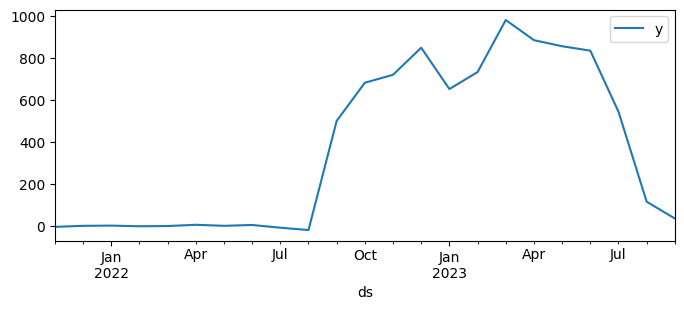

In [103]:
# Убираем тренд
de_trended = data.diff(1).dropna()

adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Временной ряд стационарен" if adf2 <0.05 else ", Временной ряд не стационарен")
de_trended.plot();

Mean is: 2857.0833333333335


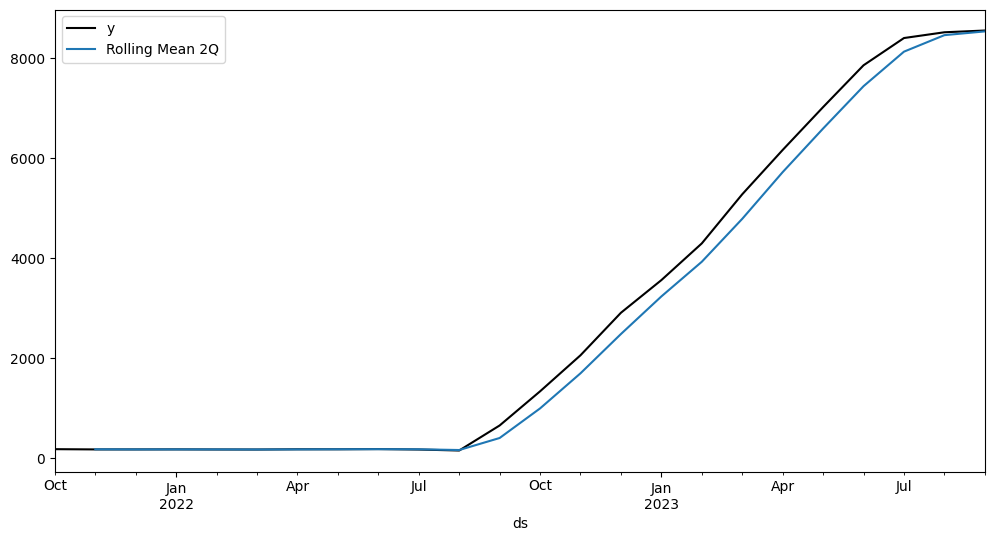

In [102]:
data.plot(figsize=(12,6), legend=True, label="data", cmap='gray')
data["y"].rolling(2, center=False).mean().plot(legend=True, label="Rolling Mean 2Q");
print("Mean is:", data["y"].mean())